In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

In [3]:
df_data = pd.read_csv("adult.csv")
df_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
df_data["native-country"].value_counts().index[0]

'United-States'

In [6]:
df_data["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [7]:
df_data = df_data.drop(['fnlwgt', 'educational-num'], axis = 1) 

In [8]:
col_names = df_data.columns

In [9]:
for c in col_names: 
    df_data = df_data.replace("?", np.NaN) 
df_data = df_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [10]:
category_col =['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
               'race', 'gender', 'native-country', 'income']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df_data[col] = labelEncoder.fit_transform(df_data[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'workclass': {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}, 'education': {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}, 'marital-status': {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}, 'occupation': {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}, 'relationship': {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}, 'ra

Text(0.5, 1.0, '<=50K Income vs >50K Income Count')

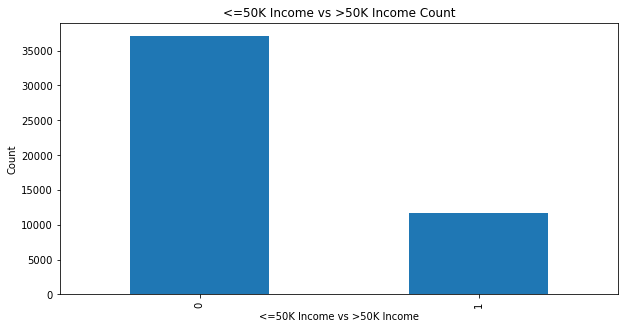

In [11]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = df_data.income.value_counts().plot(kind = 'bar')
plt.xlabel("<=50K Income vs >50K Income")
plt.ylabel("Count")
plt.title("<=50K Income vs >50K Income Count")

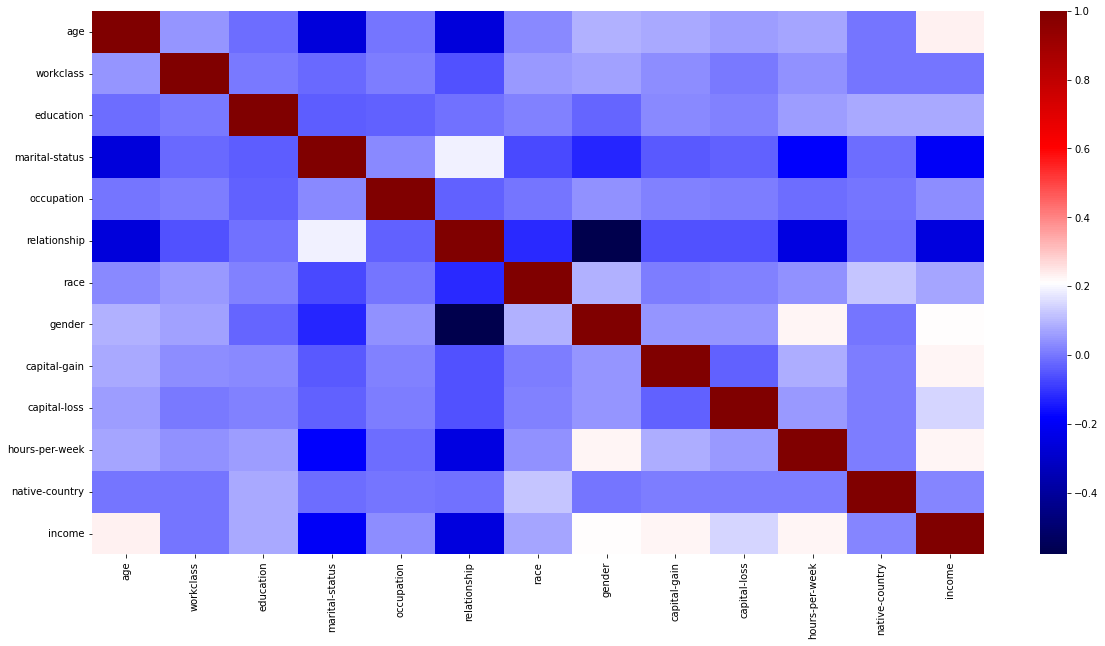

In [12]:
# Heatmap to find any high correlations
plt.figure(figsize=(20,10))
sns.heatmap(data=df_data.corr(), cmap="seismic")
plt.show()

In [13]:
X = df_data.drop('income', axis = 1) 
Y = df_data['income']

In [14]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)


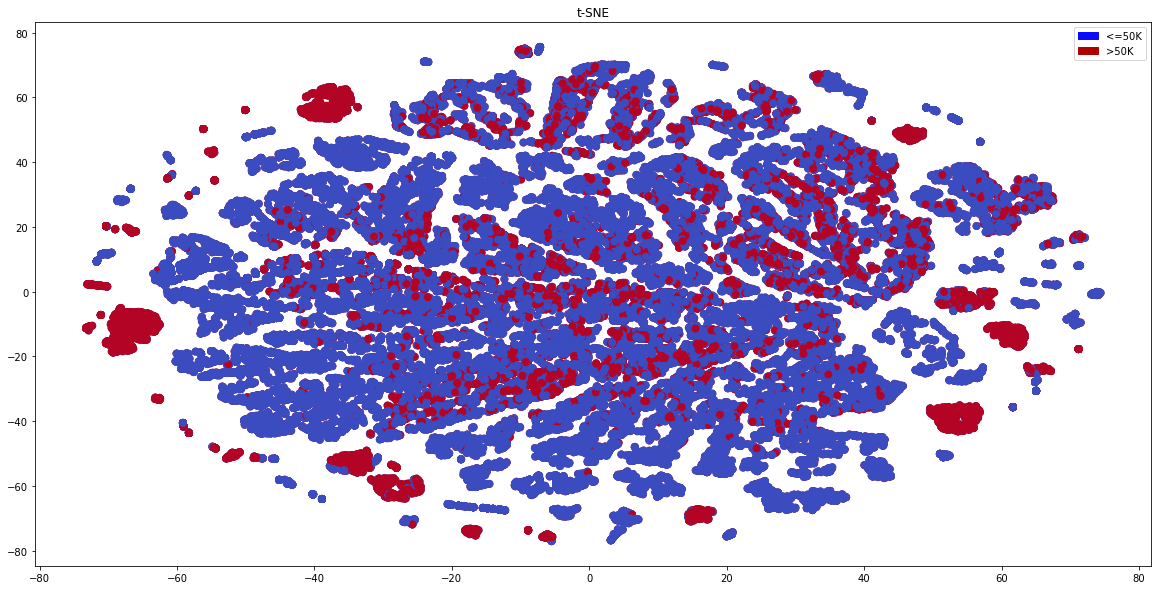

In [15]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='<=50K')
red_patch = mpatches.Patch(color='#AF0000', label='>50K')
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='<=50K', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='>50K', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred)
print("Threshold:", rf_threshold)

[[10269   852]
 [ 1393  2139]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11121
           1       0.72      0.61      0.66      3532

    accuracy                           0.85     14653
   macro avg       0.80      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653

Accuracy Score: 0.8467890534361564
Recall Score: 0.6056058890147226
Precision Score: 0.7151454363089268
ROC AUC Score:  0.7644970367652517
Threshold: [2 1 0]


In [18]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train, y_train)
ypred = gbc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
gbc_fp, gbc_tp, gbc_threshold = roc_curve(y_test, ypred)
print("Threshold:", gbc_threshold)

[[10537   584]
 [ 1461  2071]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11121
           1       0.78      0.59      0.67      3532

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653

Accuracy Score: 0.8604381355353853
Recall Score: 0.5863533408833522
Precision Score: 0.7800376647834275
ROC AUC Score:  0.7669200388437982
Threshold: [2 1 0]


In [19]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
ypred = abc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
abc_fp, abc_tp, abc_threshold = roc_curve(y_test, ypred)
print("Threshold:", abc_threshold)

[[10438   683]
 [ 1365  2167]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11121
           1       0.76      0.61      0.68      3532

    accuracy                           0.86     14653
   macro avg       0.82      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653

Accuracy Score: 0.8602333993038969
Recall Score: 0.613533408833522
Precision Score: 0.7603508771929824
ROC AUC Score:  0.7760590342432155
Threshold: [2 1 0]


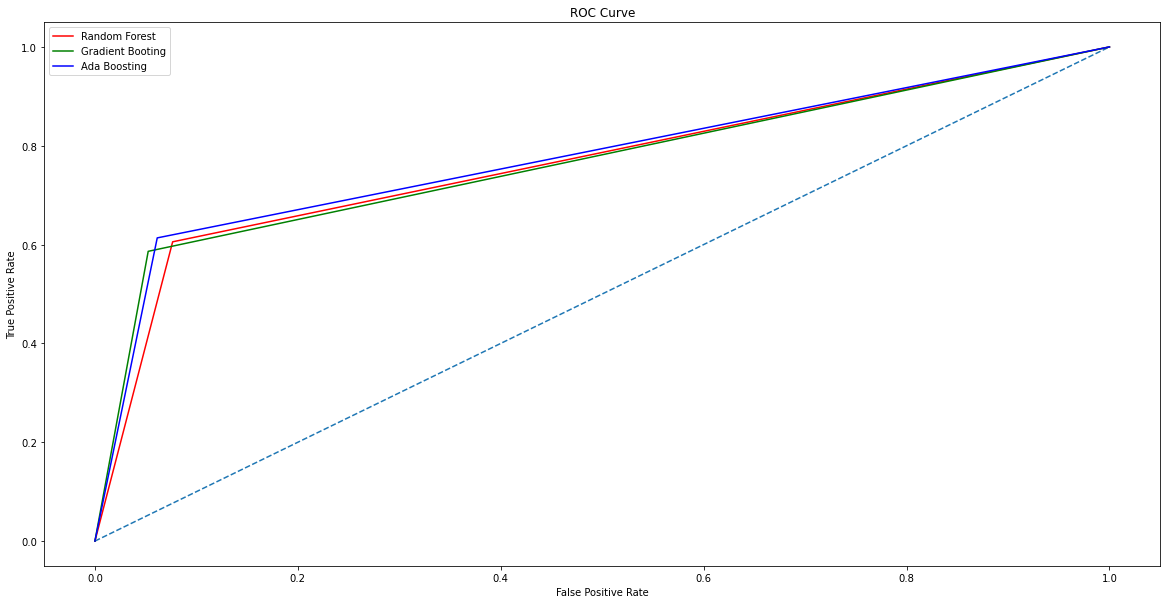

In [20]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(rf_fp, rf_tp, color="red", label = "Random Forest")
plt.plot(gbc_fp, gbc_tp, color="green", label = "Gradient Booting")
plt.plot(abc_fp, abc_tp, color="blue", label = "Ada Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [21]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
0,age,0.224578
8,capital-gain,0.133955
10,hours-per-week,0.116213
5,relationship,0.108995
2,education,0.103440
4,occupation,0.091304
3,marital-status,0.074190
1,workclass,0.048131
9,capital-loss,0.047826
11,native-country,0.019855


Text(0.5, 1.0, 'Plot Feature Importances')

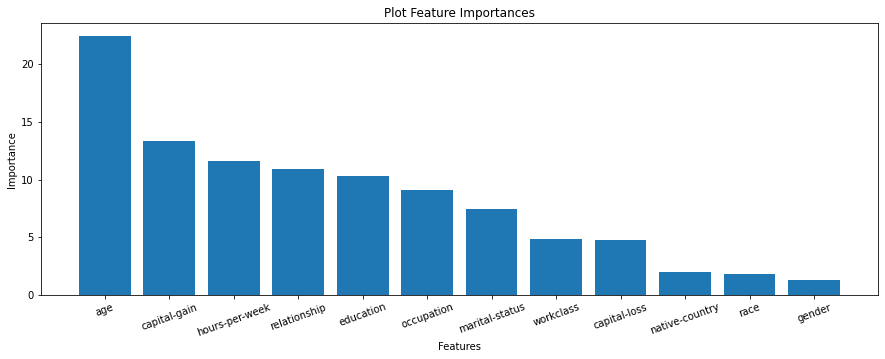

In [22]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

In [23]:
pickle_out = open("model.pkl", "wb")
pickle.dump(gbc, pickle_out)
pickle_out.close()